# Clustering with K-means

## Understanding centroid-based algorithms

In [1]:
import numpy as np
A = np.array([165, 55, 70])
B = np.array([185, 60, 30])

D = (A - B)
D = D**2
D = np.sqrt(np.sum(D))

print(D)

45.0


## Creating an example with image data

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
scaler = StandardScaler()
X = scaler.fit_transform(digits.data)
ground_truth = digits.target

In [3]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=10, 
                    n_init=10, random_state=1)
clustering.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=1)

## Looking for optimal solutions

In [4]:
import numpy as np
import pandas as pd
ms = np.column_stack((ground_truth,clustering.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Ground truth','Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], 
            margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,176,1,178
1,0,59,0,27,0,1,0,95,0,0,182
2,0,5,100,46,4,1,0,21,0,0,177
3,0,0,13,1,154,1,0,14,0,0,183
4,158,6,0,0,0,2,8,7,0,0,181
5,1,0,16,0,30,131,0,2,0,2,182
6,0,1,0,0,0,0,0,1,1,178,181
7,1,2,6,0,0,1,18,151,0,0,179
8,0,14,7,0,55,6,0,88,0,4,174


In [5]:
import numpy as np
inertia = list()
for k in range(1,21):
    clustering = KMeans(n_clusters=k, 
                        n_init=10, random_state=1)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
delta_inertia = np.diff(inertia) * -1

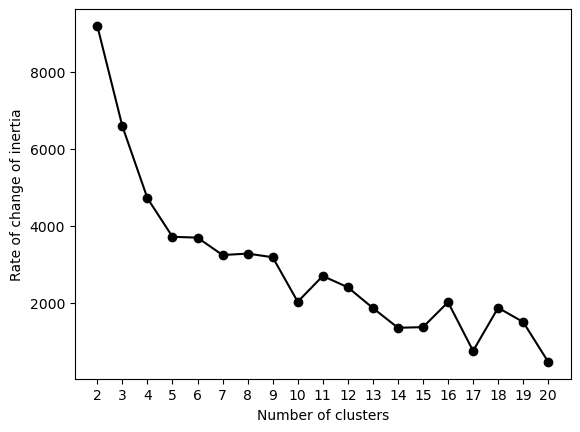

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
x_range = [k for k in range(2, 21)]
plt.xticks(x_range)
plt.plot(x_range, delta_inertia, 'ko-')
plt.xlabel('Number of clusters')
plt.ylabel('Rate of change of inertia')
plt.show()

## Clustering big data

In [7]:
k = 10
clustering = KMeans(n_clusters=k, 
                    n_init=10, random_state=1)
clustering.fit(X)
kmeans_inertia = clustering.inertia_
print(f"K-means inertia: {kmeans_inertia:0.1f}")

K-means inertia: 69944.5


In [8]:
from sklearn.cluster import MiniBatchKMeans
batch_clustering = MiniBatchKMeans(n_clusters=k, 
                                   random_state=1,
                                   n_init=3)
batch = 100
for row in range(0, len(X), batch):
    if row+batch < len(X):
        feed = X[row:row+batch,:]
    else:
        feed = X[row:,:]
    batch_clustering.partial_fit(feed)
batch_inertia = batch_clustering.score(X) * -1

print(f"MiniBatchKmeans inertia: {batch_inertia:.1f}")

C:\Users\John\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKmeans inertia: 76426.4


# Performing Hierarchical Clustering

## Using a hierarchical cluster solution

In [9]:
from sklearn.cluster import AgglomerativeClustering

hclustering = AgglomerativeClustering(
    n_clusters=10, metric='euclidean', 
    linkage='ward')
hclustering.fit(X)

ms = np.column_stack((ground_truth,hclustering.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Ground truth','Clusters'])
pd.crosstab(df['Ground truth'], 
            df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,1,150,0,27,0,0,0,0,4,0,182
2,0,15,1,160,1,0,0,0,0,0,177
3,0,11,0,4,168,0,0,0,0,0,183
4,1,4,1,0,0,0,0,12,163,0,181
5,168,0,0,1,12,0,1,0,0,0,182
6,0,1,0,0,0,0,180,0,0,0,181
7,1,1,0,0,1,0,0,25,0,151,179
8,1,168,0,3,2,0,0,0,0,0,174


## Visualizing aggregative clustering solutions

In [10]:
ground_truth[10:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

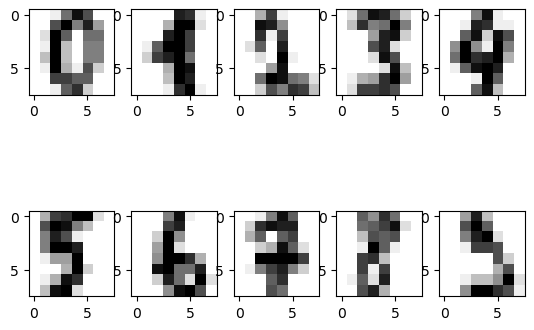

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

for k, img in enumerate(range(10)):
    plt.subplot(2, 5, k+1)
    plt.imshow(digits.images[10+img], 
               cmap='binary', 
               interpolation='none')
plt.show()

In [12]:
hclustering = AgglomerativeClustering(
    n_clusters=10, metric='euclidean',
    linkage='ward')
hclustering.fit(X[10:20, :])

AgglomerativeClustering(metric='euclidean', n_clusters=10)

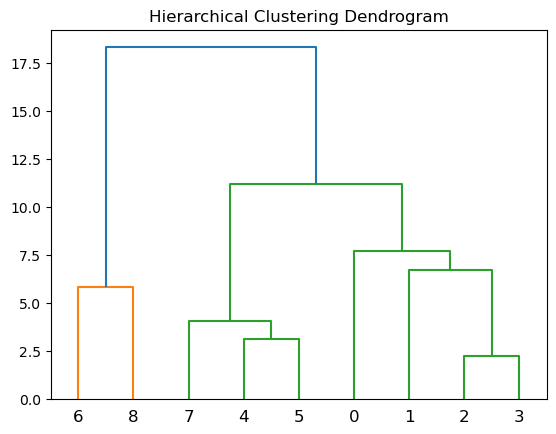

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

linkage_matrix = linkage(hclustering.children_, 'ward')

dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Discovering new groups with DBScan

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4.5, min_samples=20)
db.fit(X)

print(f"No. clusters: {len(np.unique(db.labels_))}")

No. clusters: 10


In [15]:
from collections import Counter
print(f"No. clusters: {len(np.unique(db.labels_))}")
print(Counter(db.labels_))

ms = np.column_stack((ground_truth, db.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Ground truth', 'Clusters'])

pd.crosstab(df['Ground truth'], 
            df['Clusters'], margins=True)

No. clusters: 10
Counter({-1: 1032, 0: 172, 1: 157, 4: 111, 3: 95, 5: 90, 7: 64, 6: 35, 2: 21, 8: 20})


Clusters,-1,0,1,2,3,4,5,6,7,8,All
Ground truth,,,,,,,,,,,
0,6,172,0,0,0,0,0,0,0,0,178
1,73,0,0,20,0,89,0,0,0,0,182
2,175,0,0,0,0,2,0,0,0,0,177
3,94,0,0,0,0,0,89,0,0,0,183
4,126,0,0,0,0,0,0,35,0,20,181
5,179,0,1,0,0,0,0,0,2,0,182
6,25,0,156,0,0,0,0,0,0,0,181
7,84,0,0,0,95,0,0,0,0,0,179
8,154,0,0,0,0,20,0,0,0,0,174
